# League of Legends Base Stat Analysis

## Loading Librairies

In [1]:
# Importing Libraries



# Basic Libraries #################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import datetime
import time


# For Feature Engineering #########################################################################

# For Plotting Correlation Matrix and Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Label Encoder
from sklearn.preprocessing import LabelEncoder


# For Machine Learning Techniques ##################################################################

# For Data Anaylsis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Personal Preference #############################################################################
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Select Dataset File and Target Variable


dataset_file = "LolChampBaseStats12.2.csv"
target_variable = ''

## Prelimnary Data Analysis

In [12]:
# Data Upload and Check


df_pd = pd.read_csv(dataset_file)
df_pd.head(10)

,Champion Name:,Health Points,Health Points Per Level,Health Point Regen,Health Point Regen Per Level,Mana Points,Mana Points Per Level,Mana Point Regen,Mana Point Regen Per Level,Attack Damage,Attack Damage Per Level,Attack Speed,Attack Speed Per Level,Armor,Armor Per Level,Magic Resist,Magic Resist Per Level,Movement Speed,Range
0,Aatrox,580.0,90,3.00,1.00,0.0,0.0,0.000,0.00,60.0,5.00,0.651,2.50%,38.0,3.25,32.0,1.25,345,175
1,Ahri,526.0,92,5.50,0.60,418.0,25.0,8.000,0.80,53.0,3.00,0.668,2%,21.0,3.50,30.0,0.50,330,550
2,Akali,500.0,105,9.00,0.90,200.0,0.0,50.000,0.00,62.0,3.30,0.625,3.20%,23.0,3.50,37.0,1.25,345,125
3,Akshan,560.0,90,3.75,0.65,350.0,40.0,8.175,0.70,52.0,3.50,0.638,4%,26.0,3.00,30.0,0.50,330,500
4,Alistar,600.0,106,8.50,0.85,350.0,40.0,8.500,0.80,62.0,3.75,0.625,2.13%,44.0,3.50,32.0,1.25,330,125
5,Amumu,615.0,75,9.00,0.85,285.0,40.0,7.380,0.53,53.0,3.80,0.736,2.18%,30.0,3.50,32.0,1.25,335,125
6,Anivia,480.0,82,5.50,0.55,495.0,45.0,8.000,0.80,51.0,3.20,0.625,1.68%,21.0,4.00,30.0,0.50,325,600
7,Annie,524.0,88,5.50,0.55,418.0,25.0,8.000,0.80,50.0,2.63,0.579,1.36%,19.0,4.00,30.0,0.50,335,625
8,Aphelios,530.0,88,3.25,0.55,348.0,42.0,6.500,0.40,55.0,3.00,0.640,2.10%,28.0,3.00,30.0,0.50,325,550
9,Ashe,570.0,87,3.50,0.55,280.0,32.0,6.970,0.40,59.0,2.96,0.658,3.33%,26.0,3.40,30.0,0.50,325,600


In [13]:
# Basic Analysis


pd.DataFrame(df_pd.describe())

,Health Points,Health Points Per Level,Health Point Regen,Health Point Regen Per Level,Mana Points,Mana Points Per Level,Mana Point Regen,Mana Point Regen Per Level,Attack Damage,Attack Damage Per Level,Attack Speed,Armor,Armor Per Level,Magic Resist,Magic Resist Per Level,Movement Speed,Range
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000
mean,556.946250,89.850000,6.471875,0.673125,308.357000,36.362500,8.131656,0.548812,59.308500,3.268010,0.647144,29.790625,3.47500,30.942500,0.905000,335.893750,327.062500
std,40.108744,8.430403,1.825739,0.180224,122.714946,20.117184,8.132437,0.293548,5.829346,0.656513,0.034996,6.604856,0.48713,1.652806,0.450688,8.249716,193.185305
min,340.000000,65.000000,2.500000,0.400000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.475000,17.000000,0.00000,25.000000,0.300000,285.000000,125.000000
25%,530.000000,85.000000,5.500000,0.550000,279.250000,25.000000,6.287500,0.400000,55.000000,3.000000,0.625000,24.000000,3.18750,30.000000,0.500000,330.000000,125.000000
50%,561.500000,90.000000,6.500000,0.600000,325.500000,40.000000,7.540000,0.600000,60.000000,3.200000,0.642000,29.000000,3.50000,32.000000,1.250000,335.000000,187.500000
75%,582.250000,94.000000,8.000000,0.750000,375.000000,50.000000,8.000000,0.800000,64.000000,3.500000,0.665000,35.000000,3.75000,32.000000,1.250000,340.000000,525.000000
max,740.000000,130.000000,10.000000,1.750000,500.000000,87.000000,50.000000,1.000000,72.000000,5.500000,0.800000,47.000000,5.50000,39.000000,4.000000,355.000000,650.000000


In [14]:
# Size of Dataset


df_pd.shape

(160, 19)

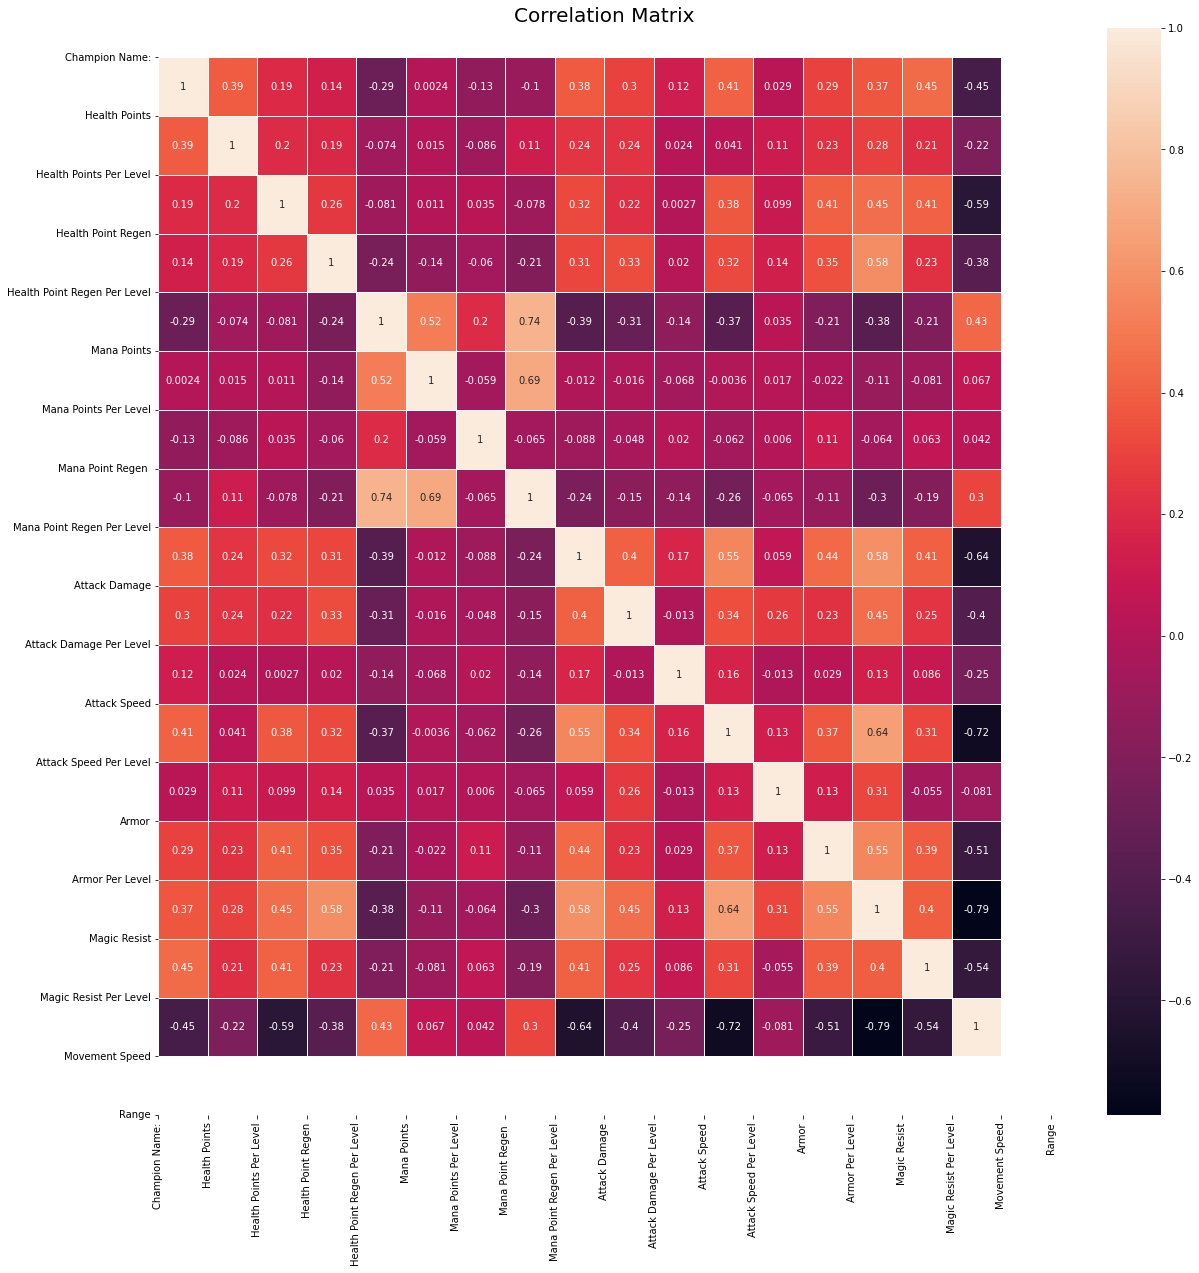

In [15]:
# Heat Map


fr_hm = df_pd #For Heat Map

## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = fr_hm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plotting heat map
g=sns.heatmap(fr_hm[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
plt.xticks(range(len(fr_hm.columns)), fr_hm.columns, rotation=90)
plt.yticks(range(len(fr_hm.columns)), fr_hm.columns)
plt.gca().xaxis.tick_bottom()
plt.show()

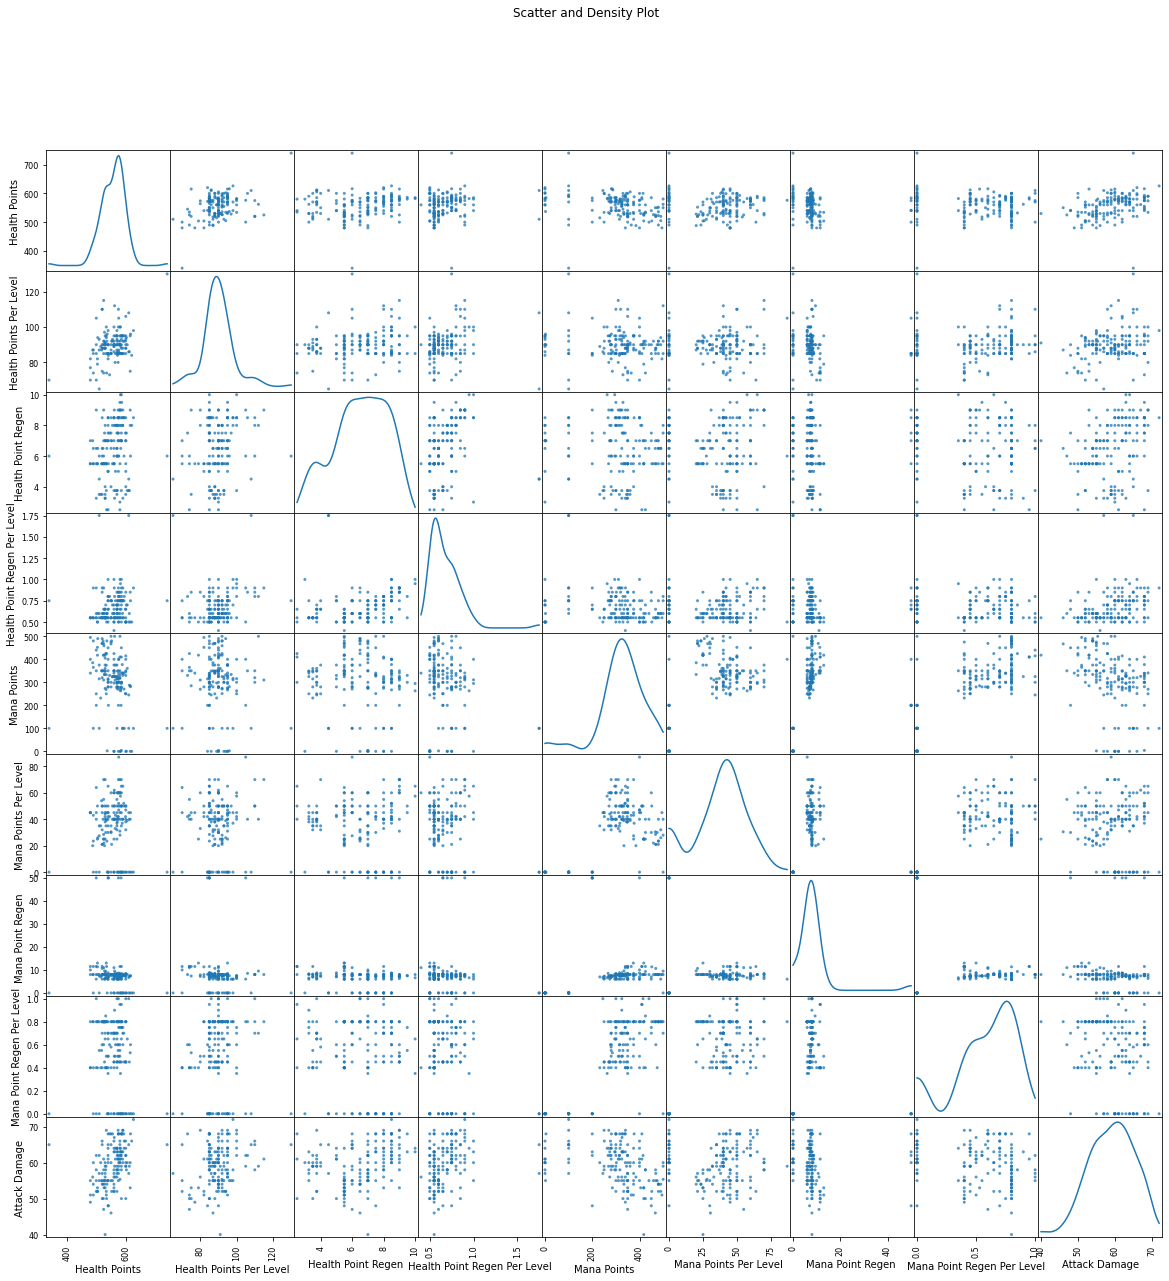

In [17]:
# Scatter Plot of Data


scatterplot_df = df_pd

def plotScatterMatrix(scatterplot_df, plotSize, textSize):
    df = scatterplot_df.select_dtypes(include =[np.number]) 
    
    df = scatterplot_df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    #for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        #ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    


plotScatterMatrix(scatterplot_df, 20, 10)